In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"kindergartens": kindergartens}

In [4]:
# services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
#             "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

/Users/mvin/Desktop/masterplanning/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# city_model.visualize()

In [7]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

total load = 12650
total capacity = 10459
fin
 load = 2191
 cap = 0
kindergartens


In [8]:

services_prov["kindergartens"]["population_prov_kindergartens"].sum()


6044

In [9]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

2306

In [10]:
services_prov["kindergartens"]['weakly_prov_kindergartens'].sum()

4415

In [11]:
services_prov["kindergartens"][services_prov["kindergartens"]['provision_kindergartens'] > 0].head()

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area,provision_kindergartens,population_prov_kindergartens,population_unprov_kindergartens,weakly_prov_kindergartens,population
15,"POLYGON ((344864.533 6647854.355, 344855.596 6...",buildings,15,True,3375.0,1.0,11360.040,0.0,0.0,3004.0,3427.28270,65429.054626,57,119,0,87,3375
16,"POLYGON ((344272.022 6648285.316, 344278.598 6...",buildings,16,True,3946.0,3.5,19338.336,4095.0,1900.0,44.0,7108.81950,102276.415413,56,135,0,106,3946
17,"POLYGON ((344477.431 6648686.065, 344490.134 6...",buildings,17,True,6026.0,2.0,32985.934,71444.0,43427.0,2911.0,30788.58880,338912.554925,69,255,112,0,6026
18,"POLYGON ((344059.128 6648753.606, 344059.172 6...",buildings,18,True,4222.0,1.0,19467.875,12479.0,11708.0,128.0,8921.20723,158850.983702,52,135,2,120,4222
20,"POLYGON ((344542.320 6648943.596, 344542.403 6...",buildings,20,True,5956.0,9.0,31287.166,41360.0,7509.0,0.0,6385.50440,248549.074482,70,255,108,0,5956


In [12]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# def show_me_chart(fig, gs, prov, name, i):
#   ax = fig.add_subplot(gs[i//3, i%3])
#   prov.plot(column="provision_"+name, legend=True, ax=ax, cmap='RdYlGn')
#   ax.set_title(name +" provision")
#   prov[prov["population"] == 0].plot(ax=ax, color="#ddd", alpha=1)


# kindergartens_prov = services_prov["kindergartens"]
# schools_prov = services_prov["schools"]
# recreational_areas_prov = services_prov["recreational_areas"]
# hospitals_prov = services_prov["hospitals"]
# pharmacies_prov = services_prov["pharmacies"]
# policlinics_prov = services_prov["policlinics"]

# fig = plt.figure(figsize=(25, 15))
# gs = GridSpec(2, 3, figure=fig)

# i = 0
# for service_type in services_prov:
#   show_me_chart(fig, gs, services_prov[service_type], service_type, i)
#   i = i+1

# plt.show()

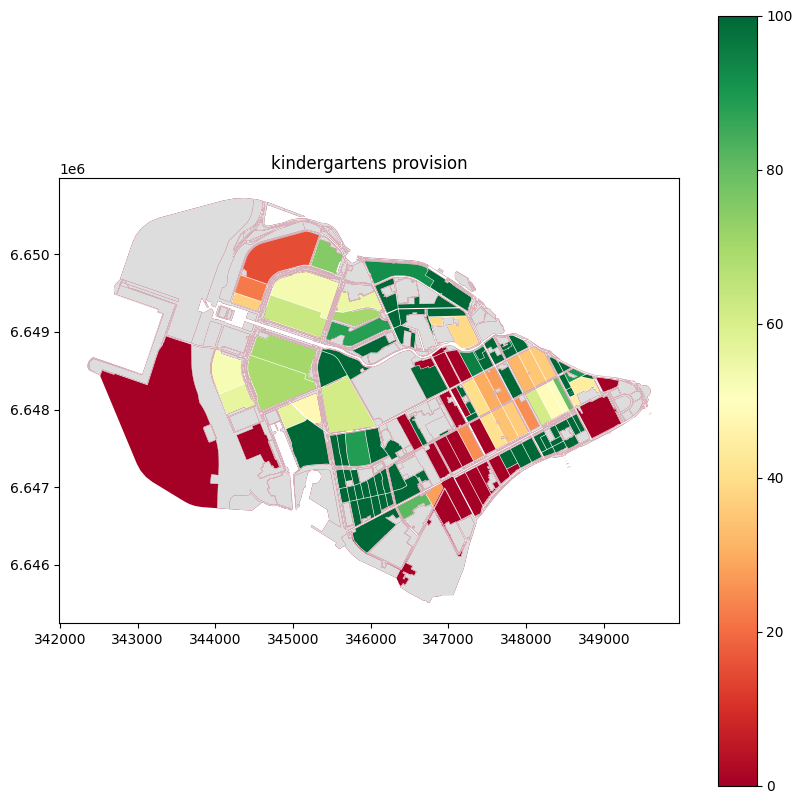

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()


In [14]:
updated_block = {'block_id': 218,
  'population': 0,
  'is_kindergartens_service': 1,
  'kindergartens_capacity': 5000}

In [15]:
graph_base = city_model.services_graph.copy()
graph = graph_base.copy()

if updated_block['block_id'] in graph.nodes:
    for attr_name, attr_value in updated_block.items():
        if attr_name in graph.nodes[updated_block['block_id']]:
            graph.nodes[updated_block['block_id']][attr_name] += attr_value

city_model.services_graph = graph

services_prov = {}
for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

city_model.services_graph = graph_base

total load = 12650
total capacity = 15459
fin
 load = 715
 cap = 3524
kindergartens


In [16]:
services_prov["kindergartens"]["population_prov_kindergartens"].sum()

6485

In [17]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

840

In [18]:
services_prov["kindergartens"]['weakly_prov_kindergartens'].sum()

5450

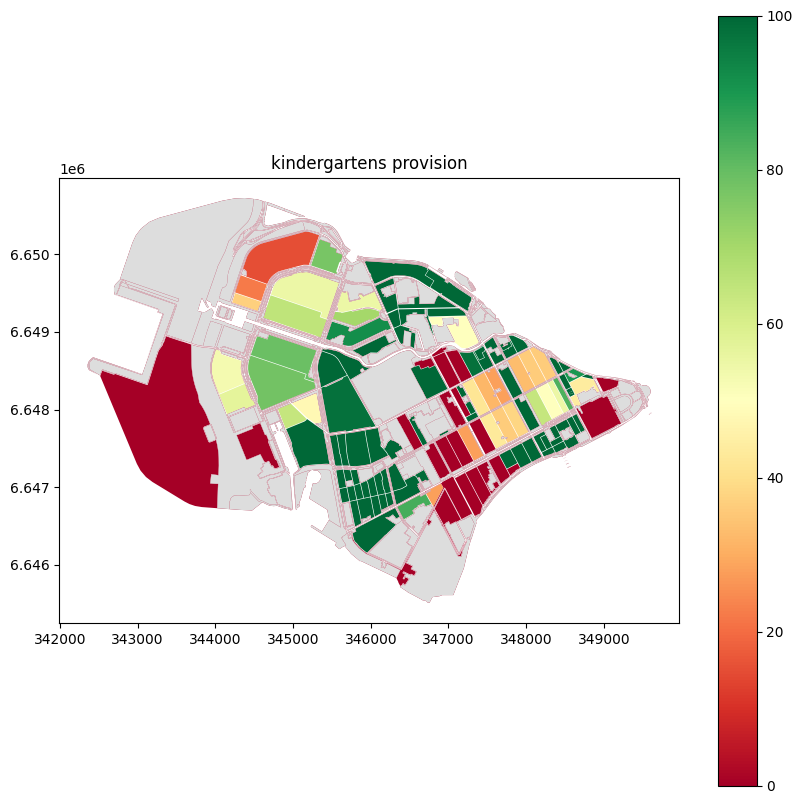

In [19]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()

In [20]:
df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]

kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)
print(f"Total provision before {kindergartens_all}")

Total provision before 84.25
